<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Очистка-данных" data-toc-modified-id="Очистка-данных-1">Очистка данных</a></span></li><li><span><a href="#Основные-статистики" data-toc-modified-id="Основные-статистики-2">Основные статистики</a></span></li><li><span><a href="#Анализ-количественных-переменных" data-toc-modified-id="Анализ-количественных-переменных-3">Анализ количественных переменных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Гистограмма-распределения-цен,-формула-Скотта" data-toc-modified-id="Гистограмма-распределения-цен,-формула-Скотта-3.0.1">Гистограмма распределения цен, формула Скотта</a></span></li><li><span><a href="#Гистограмма-распределения-мощностей,-формула-Стерджесса" data-toc-modified-id="Гистограмма-распределения-мощностей,-формула-Стерджесса-3.0.2">Гистограмма распределения мощностей, формула Стерджесса</a></span></li><li><span><a href="#Гистограмма-распределения-пробега,-формула-Стерджесса" data-toc-modified-id="Гистограмма-распределения-пробега,-формула-Стерджесса-3.0.3">Гистограмма распределения пробега, формула Стерджесса</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-качественных-переменных" data-toc-modified-id="Анализ-качественных-переменных-4">Анализ качественных переменных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Диаграмма-Парето-для-марок-авто" data-toc-modified-id="Диаграмма-Парето-для-марок-авто-4.0.1">Диаграмма Парето для марок авто</a></span></li><li><span><a href="#Диаграмма-Парето-для-количества-владельцев" data-toc-modified-id="Диаграмма-Парето-для-количества-владельцев-4.0.2">Диаграмма Парето для количества владельцев</a></span></li><li><span><a href="#Диаграмма-Парето-для-года-выпуска" data-toc-modified-id="Диаграмма-Парето-для-года-выпуска-4.0.3">Диаграмма Парето для года выпуска</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-статистической-связи" data-toc-modified-id="Анализ-статистической-связи-5">Анализ статистической связи</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Графический-анализ-пары-«числовая-зависимая-переменная-–-числовая-независимая-переменная»." data-toc-modified-id="Графический-анализ-пары-«числовая-зависимая-переменная-–-числовая-независимая-переменная».-5.0.1">Графический анализ пары «числовая зависимая переменная – числовая независимая переменная».</a></span></li><li><span><a href="#Графический-анализ-пары-«числовая-зависимая-переменная-–-качественная-независимая-переменная»." data-toc-modified-id="Графический-анализ-пары-«числовая-зависимая-переменная-–-качественная-независимая-переменная».-5.0.2">Графический анализ пары «числовая зависимая переменная – качественная независимая переменная».</a></span><ul class="toc-item"><li><span><a href="#Зависимость-цены-авто-от-марки" data-toc-modified-id="Зависимость-цены-авто-от-марки-5.0.2.1">Зависимость цены авто от марки</a></span></li><li><span><a href="#Зависимость-цены-авто-от-года-выпуска,-зависимость-цены-авто-от-количества-владельцев" data-toc-modified-id="Зависимость-цены-авто-от-года-выпуска,-зависимость-цены-авто-от-количества-владельцев-5.0.2.2">Зависимость цены авто от года выпуска, зависимость цены авто от количества владельцев</a></span></li></ul></li><li><span><a href="#Корреляционная-матрица-для-количественных-переменных" data-toc-modified-id="Корреляционная-матрица-для-количественных-переменных-5.0.3">Корреляционная матрица для количественных переменных</a></span></li><li><span><a href="#Анализ-наличия-корреляции-между-независимыми-переменными" data-toc-modified-id="Анализ-наличия-корреляции-между-независимыми-переменными-5.0.4">Анализ наличия корреляции между независимыми переменными</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as mpatches

# Очистка данных

In [2]:
df = pd.read_csv('new_data_99_06_03_13_04.csv', index_col=0)

df = df.drop(['color', 'modelDate', 'name', 'engineDisplacement', 
              'description', 'Комплектация', 'Руль', 
              'ПТС', 'Таможня', 'Владение', 'bodyType', 'numberOfDoors'], axis=1)

df.dropna(inplace=True)

df = df.rename(columns={'brand':'brand', 'fuelType':'fuel_type', 'productionDate':'year',
                   'vehicleConfiguration':'transmission', 'enginePower':'engine_power', 'mileage':'mileage', 
                   'Привод':'drive', 'Владельцы':'num_of_owners', 'Price':'price'})

df['transmission'] = list(map(lambda x: x.lower(), df['transmission']))

df = df.replace(to_replace='передний', value='FWD')
df = df.replace(to_replace='задний', value='RWD')
df = df.replace(to_replace='полный', value='4WD')

df = df.replace(to_replace='бензин', value='petrol')
df = df.replace(to_replace='дизель', value='diesel')
df = df.replace(to_replace='гибрид', value='hybrid')
df = df.replace(to_replace='газ', value='gas')
df = df.replace(to_replace='электро', value='electric')

df = df.astype({'num_of_owners': 'int64'})
df = df.astype({'engine_power': 'int64'})

df = df.iloc[np.where(df['price'] < 5e6)]

In [3]:
df.to_csv('data.csv', sep=';', encoding='utf-8', index=False)

In [4]:
hybrid = df[df['fuel_type']=='hybrid']
gas = df[df['fuel_type']=='gas']
electric = df[df['fuel_type']=='electric']

df = pd.concat([df.sample(n=10000, random_state=123), hybrid, gas, electric])
df.drop_duplicates(inplace=True)
df

,brand,fuel_type,year,transmission,engine_power,mileage,drive,num_of_owners,price
6143,BMW,petrol,2002,automatic,143,300000,RWD,3,330000
43765,TOYOTA,diesel,2016,automatic,249,53000,4WD,1,4300000
80779,NISSAN,petrol,2011,automatic,110,91000,FWD,2,385000
57797,NISSAN,petrol,2014,variator,173,98000,FWD,1,929000
45838,TOYOTA,petrol,2014,variator,146,66000,4WD,2,1190000
...,...,...,...,...,...,...,...,...,...
96068,NISSAN,electric,2015,automatic,109,43500,FWD,1,799990
96069,NISSAN,electric,2015,automatic,109,57800,FWD,1,1620000
98327,NISSAN,electric,2013,automatic,109,67436,FWD,2,950000
100350,NISSAN,electric,2014,automatic,109,58000,FWD,1,590000


In [5]:
df = df.drop(['transmission', 'drive', 'fuel_type'], axis=1)

# Основные статистики

In [7]:
des = df.drop(['year', 'num_of_owners'], axis=1).describe().T
kurt = []
skew = []
median = []
iqr = []
missing = []
for ind in des.index:
    kurt.append(stats.kurtosis(df[ind]))
    skew.append(stats.skew(df[ind]))
    median.append(np.median(df[ind]))
    iqr.append(stats.iqr(df[ind]))
    missing.append(df[ind].isna().sum())
des['iqr'] = iqr
des['median'] = median
des['skew'] = skew
des['kurtosis'] = kurt
des['missing'] = missing

new_index = ['count', 'missing', 'median', 'mean', 'std', 'min', 'max', '25%', '50%', '75%', 'iqr', 'skew', 'kurtosis']
des = des.T.reindex(new_index)
des.to_excel('./Extras/stats.xlsx')
print(des)

          engine_power         mileage         price
count     10542.000000    10542.000000  1.054200e+04
missing       0.000000        0.000000  0.000000e+00
median      169.000000   134000.000000  7.400000e+05
mean        184.058148   148196.723013  9.761732e+05
std          80.742417    91925.128215  8.050296e+05
min          46.000000        2.000000  2.500000e+04
max         585.000000  1000000.000000  4.999999e+06
25%         125.000000    85940.750000  4.500000e+05
50%         169.000000   134000.000000  7.400000e+05
75%         225.000000   192859.750000  1.250000e+06
iqr         100.000000   106919.000000  8.000000e+05
skew          1.488492        1.424762  1.951699e+00
kurtosis      3.201170        5.381354  4.575428e+00


# Анализ количественных переменных

In [8]:
def sturges_bins(data):
    """
    Вычисляет количество столбиков для построения гистограммы по правилу Стерджесса
    
    Parameters
    ----------
    data : array-like
           Массив данных, для которого необходимо построить гистограмму
    
    Returns
    -------
    n_bins : integer
             Количество столбиков для построения гистограммы
    """
    n = len(data)
    return 1 + int(np.ceil(np.log2(n)))

def freedman_diaconis_bins(data):
    """
    Вычисляет количество столбиков для построения гистограммы по правилу Фридмана-Диакониса
    
    Parameters
    ----------
    data : array-like
           Массив данных, для которого необходимо построить гистограмму
    
    Returns
    -------
    n_bins : integer
             Количество столбиков для построения гистограммы
    """
    n = len(data)
    h = 2*stats.iqr(data) / n**(1/3)
    return int(np.ceil((data.max() - data.min()) / h))

def scott_bins(data):
    """
    Вычисляет количество столбиков для построения гистограммы по правилу Скотта
    
    Parameters
    ----------
    data : array-like
           Массив данных, для которого необходимо построить гистограмму
    
    Returns
    -------
    n_bins : integer
             Количество столбиков для построения гистограммы
    """
    n = len(data)
    h = 3.5 * data.std() / n**(1/3)
    return int(np.ceil((data.max() - data.min()) / h))

### Гистограмма распределения цен, формула Скотта

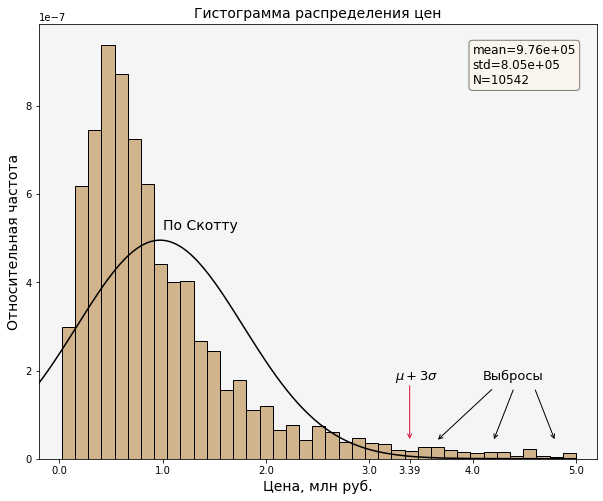

In [9]:
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.hist(df['price'], bins=scott_bins(df['price']), color='tan', edgecolor='black', density=True)
ax.patch.set_facecolor('whitesmoke')

ax.set_xlabel('Цена, млн руб.', fontsize=14)
ax.set_ylabel('Относительная частота', fontsize=14)
ax.set_title('Гистограмма распределения цен', fontsize=14)

x = np.linspace(-0.2e6, df['price'].max(), 200)
y = stats.norm.pdf(x, loc=df['price'].mean(), scale=df['price'].std())
ax.plot(x, y, color='black')



mu_3_sigma = df['price'].mean() + 3*df['price'].std()

xt = ax.get_xticks() 
xt = np.append(xt, mu_3_sigma)
ax.set_xticks(xt)

ax.text(3.25e6, 1.8e-7, '$\mu+3\sigma$', fontsize=13)
ax.annotate("", xy=(mu_3_sigma, 0.4e-7), xytext=(mu_3_sigma, 1.7e-7), arrowprops=dict(arrowstyle='->', color='crimson'))

ax.text(4.1e6, 1.8e-7, 'Выбросы', fontsize=13)
ax.annotate("", xy=(3.65e6, 0.4e-7), xytext=(4.2e6, 1.6e-7), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(4.2e6, 0.4e-7), xytext=(4.4e6, 1.6e-7), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(4.8e6, 0.4e-7), xytext=(4.6e6, 1.6e-7), arrowprops=dict(arrowstyle='->'))

props = dict(boxstyle='round', facecolor='oldlace', alpha=0.5)
ax.text(4e6, 8.5e-7, f'mean={df["price"].mean():.2e}\n'
          f'std={df["price"].std():.2e}\n'
          f'N={df["price"].count()}', fontsize=12, bbox=props)
ax.text(1e6, 5.2e-7, 'По Скотту', fontsize=14)
ax.xaxis.set_major_formatter(lambda x, p: format(round(x/10**6, 2), ','))
ax.set_xlim(-0.2e6, 5.2e6)

plt.savefig('./Images/Гистограмма распределения цен.png')
plt.show()

### Гистограмма распределения мощностей, формула Стерджесса

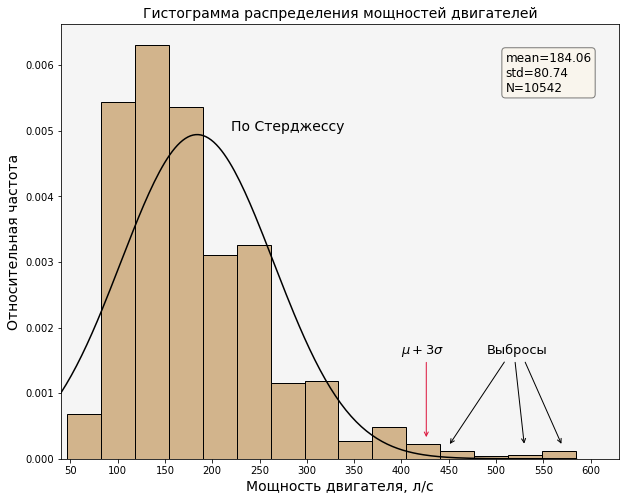

In [10]:
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.hist(df['engine_power'], bins=sturges_bins(df['engine_power']), color='tan', edgecolor='black', density=True)
ax.patch.set_facecolor('whitesmoke')

ax.set_xlabel('Мощность двигателя, л/с', fontsize=14)
ax.set_ylabel('Относительная частота', fontsize=14)
ax.set_title('Гистограмма распределения мощностей двигателей', fontsize=14)

x = np.linspace(40, df['engine_power'].max(), 200)
y = stats.norm.pdf(x, loc=df['engine_power'].mean(), scale=df['engine_power'].std())
ax.plot(x, y, color='black')



mu_3_sigma = df['engine_power'].mean() + 3*df['engine_power'].std()

ax.text(400, 0.0016, '$\mu+3\sigma$', fontsize=13)
ax.annotate("", xy=(mu_3_sigma, 0.0003), xytext=(mu_3_sigma, 0.0015), 
              arrowprops=dict(arrowstyle='->', color='crimson'))

ax.text(490, 0.0016, 'Выбросы', fontsize=13)
ax.annotate("", xy=(450, 0.0002), xytext=(510, 0.0015), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(530, 0.0002), xytext=(520, 0.0015), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(570, 0.0002), xytext=(530, 0.0015), arrowprops=dict(arrowstyle='->'))

props = dict(boxstyle='round', facecolor='oldlace', alpha=0.5)
ax.text(510, 0.0056, f'mean={df["engine_power"].mean():.2f}\n'
            f'std={df["engine_power"].std():.2f}\n'
            f'N={df["engine_power"].count()}', fontsize=12, bbox=props)
ax.text(220, 0.005, 'По Стерджессу', fontsize=14)
ax.set_xticks([50*x for x in range(13)])
ax.set_xlim(40, 630)

plt.savefig('./Images/Гистограмма распределения мощностей двигателей.png')
plt.show()

### Гистограмма распределения пробега, формула Стерджесса

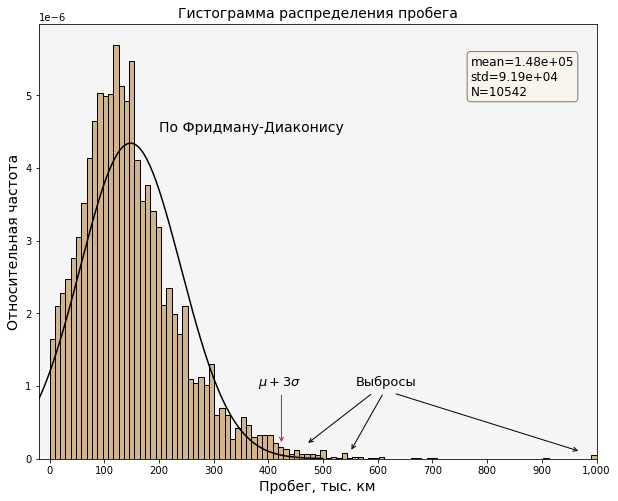

In [11]:
plt.figure(figsize=(10,8))
ax = plt.subplot()

ax.hist(df["mileage"], bins=freedman_diaconis_bins(df["mileage"]), color='tan', edgecolor='black', density=True)
ax.patch.set_facecolor('whitesmoke')

ax.set_xlabel('Пробег, тыс. км', fontsize=14)
ax.set_ylabel('Относительная частота', fontsize=14)
ax.set_title('Гистограмма распределения пробега', fontsize=14)

x = np.linspace(-0.2e5, 0.5e6, 200)
y = stats.norm.pdf(x, loc=df["mileage"].mean(), scale=df["mileage"].std())
ax.plot(x, y, color='black')

mu_3_sigma = df['mileage'].mean() + 3*df['mileage'].std()

ax.text(mu_3_sigma-0.1*mu_3_sigma, 1e-6, '$\mu+3\sigma$', fontsize=13)
ax.set_xlim(0, 1e6)
ax.annotate("", xy=(mu_3_sigma, 0.2e-6), xytext=(mu_3_sigma, 0.9e-6), 
               arrowprops=dict(arrowstyle='->', color='crimson'))

ax.text(5.6e5, 1e-6, 'Выбросы', fontsize=13)
ax.annotate("", xy=(4.7e5, 2e-7), xytext=(5.9e5, 0.9e-6), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(5.5e5, 1e-7), xytext=(6.1e5, 0.9e-6), arrowprops=dict(arrowstyle='->'))
ax.annotate("", xy=(9.7e5, 1e-7), xytext=(6.3e5, 0.9e-6), arrowprops=dict(arrowstyle='->'))

props = dict(boxstyle='round', facecolor='oldlace', alpha=0.5) 
ax.text(7.7e5, 5e-6, f'mean={df["mileage"].mean():.2e}\n'
            f'std={df["mileage"].std():.2e}\n'
            f'N={df["mileage"].count()}', fontsize=12, bbox=props)
ax.text(0.2e6, 4.5e-6, 'По Фридману-Диаконису', fontsize=14)
ax.set_xlim(-0.2e5, 1e6)
ax.set_xticks([x*10**5 for x in range(11)])
ax.xaxis.set_major_formatter(lambda x, p: format(int(x/1000), ','))

plt.savefig('./Images/Гистограмма распределения пробега.png')
plt.show()

# Анализ качественных переменных

### Диаграмма Парето для марок авто

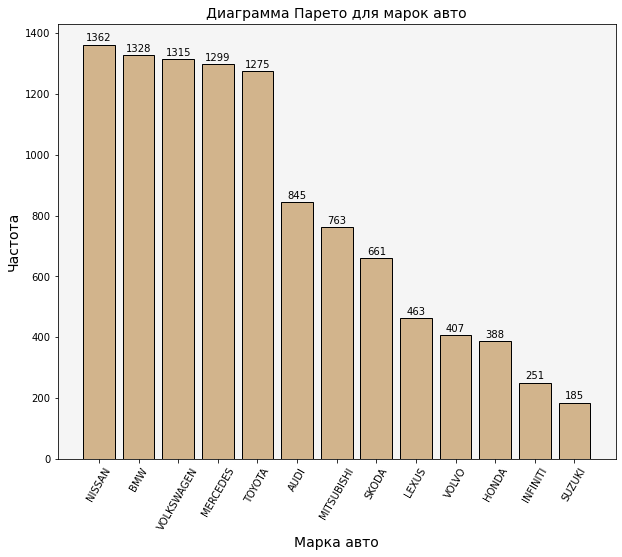

In [12]:
brand = df['brand'].value_counts()

plt.figure(figsize=(10,8))
ax = plt.subplot()
ax.patch.set_facecolor('whitesmoke')
ax.bar(brand.index, brand.values, edgecolor='black', color='tan')

rects = ax.patches
for rect, label in zip(rects, brand):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label,
            ha='center', va='bottom')

ax.set_title('Диаграмма Парето для марок авто', fontsize=14)
ax.set_xlabel('Марка авто', fontsize=14)
ax.set_ylabel('Частота', fontsize=14)

plt.xticks(fontsize=10, rotation=60)

plt.savefig('./Images/Диаграмма Парето для марок авто.png')
plt.show()

### Диаграмма Парето для количества владельцев

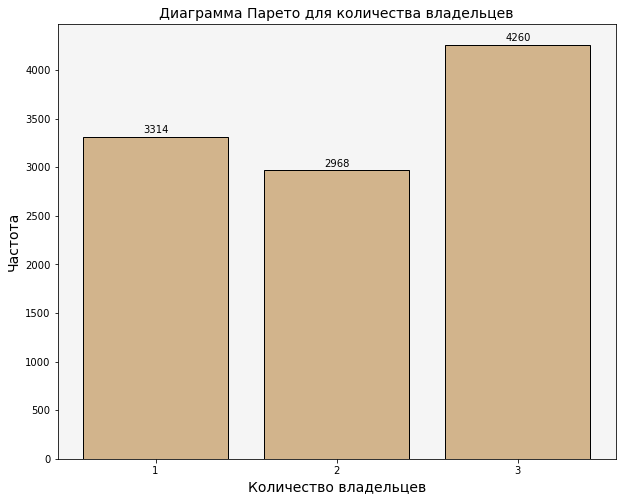

In [13]:
owners = df['num_of_owners'].value_counts()

plt.figure(figsize=(10,8))
ax = plt.subplot()
ax.patch.set_facecolor('whitesmoke')
ax.bar(owners.index, owners.values, edgecolor='black', color='tan')

rects = ax.patches
for rect, label in zip(rects, owners):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+20, label,
    ha='center', va='bottom')

ax.set_title('Диаграмма Парето для количества владельцев', fontsize=14)
ax.set_xlabel('Количество владельцев', fontsize=14)
ax.set_ylabel('Частота', fontsize=14)
ax.set_xticks([1, 2, 3])

plt.savefig('./Images/Диаграмма Парето для количества владельцев.png')
plt.show()

### Диаграмма Парето для года выпуска

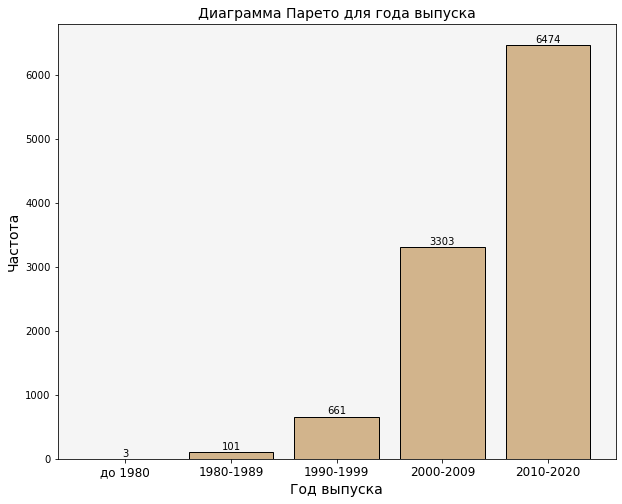

In [14]:
year = df['year'].value_counts()
prices = []
prices.append(len(list(df[df['year']<1980]['price'])))
prices.append(len(list(df[(df['year']<1990) & (df['year']>=1980)]['price'])))
prices.append(len(list(df[(df['year']<2000) & (df['year']>=1990)]['price'])))
prices.append(len(list(df[(df['year']<2010) & (df['year']>=2000)]['price'])))
prices.append(len(list(df[df['year']>=2010]['price'])))
labels=['до 1980', '1980-1989', '1990-1999', '2000-2009', '2010-2020']

plt.figure(figsize=(10,8))
ax = plt.subplot()
ax.patch.set_facecolor('whitesmoke')
ax.bar(labels, prices, edgecolor='black', color='tan')

rects = ax.patches
for rect, label in zip(rects, prices):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label,
    ha='center', va='bottom')

ax.set_title('Диаграмма Парето для года выпуска', fontsize=14)
ax.set_xlabel('Год выпуска', fontsize=14)
ax.set_ylabel('Частота', fontsize=14)

plt.xticks(fontsize=12)

plt.savefig('./Images/Диаграмма Парето для года выпуска.png')
plt.show()

# Анализ статистической связи

### Графический анализ пары «числовая зависимая переменная – числовая независимая переменная». 

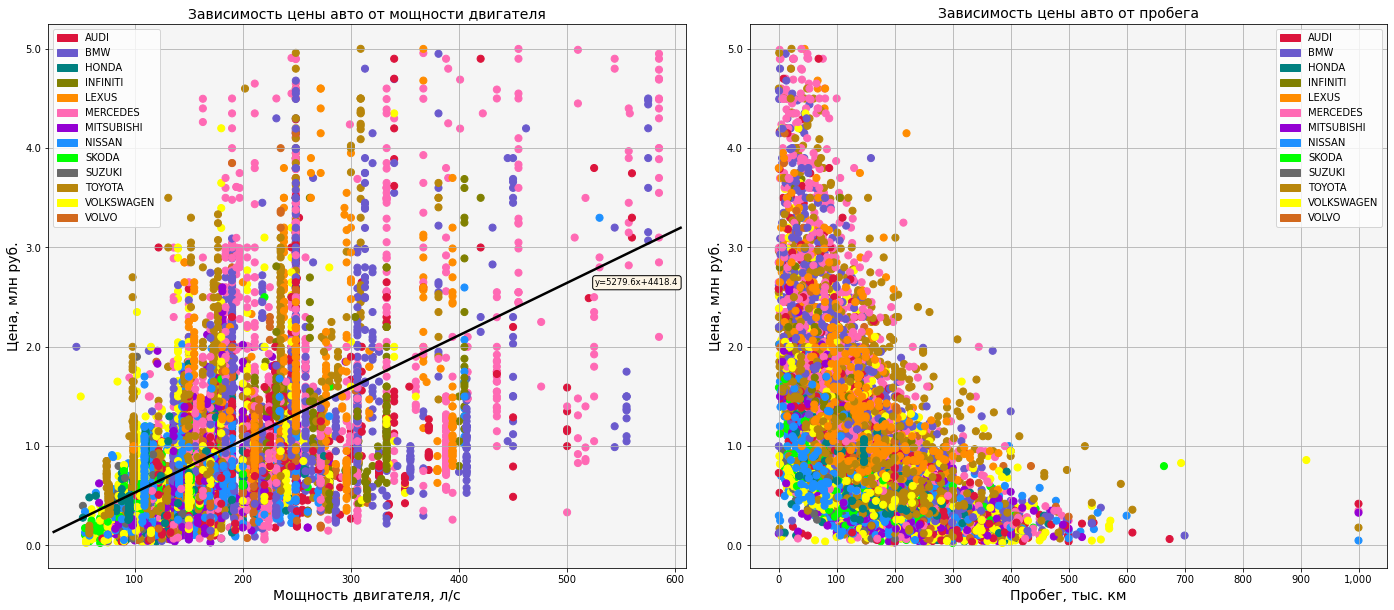

In [15]:
variables = {'engine_power':'Мощность двигателя, л/с','mileage':'Пробег, тыс. км'}
brands = sorted(list(set(df['brand'])))
colors = ['crimson', 'slateblue', 'teal', 'olive',
          'darkorange', 'hotpink', 'darkviolet', 'dodgerblue',
          'lime', 'dimgray', 'darkgoldenrod', 'yellow', 'chocolate']

cmap = {}
for b,c in zip(brands, colors):
    cmap[b] = c

fig, ax = plt.subplots(1, len(variables), figsize=(len(variables)*12, 10))
for i, name in enumerate(variables):
    ax[i].scatter(df[name], df['price'], alpha=1, marker='.', c=df['brand'].map(cmap), label=list(cmap.keys()),
                 s=200)
    ax[i].grid()
    ax[i].patch.set_facecolor('whitesmoke')
    ax[i].set_xlabel(variables[name], fontsize=14)
    ax[i].set_ylabel('Цена, млн руб.', fontsize=14)
    ax[i].yaxis.set_major_formatter(lambda x, p: format(round(x/10**6, 2), ','))
    handles = []
    for key,val in cmap.items():
        handles.append(mpatches.Patch(color=val, label=key))
    ax[i].legend(handles=handles, fontsize=10)

ax[0].set_title('Зависимость цены авто от мощности двигателя', fontsize=14)
ax[1].set_title('Зависимость цены авто от пробега', fontsize=14)

ax[1].set_xticks([x*10**5 for x in range(11)])
ax[1].xaxis.set_major_formatter(lambda x, p: format(int(x/1000), ','))


X = list(df['engine_power'])
Y = list(df['price'])
mean_x = np.mean(X)
mean_y = np.mean(Y)
numer = 0
denom = 0
for i in range(len(X)):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)
max_x = 605
min_x = 25
x = np.linspace(min_x, max_x, 200)
y = c + m * x
ax[0].plot(x, y, '-k', linewidth=2.5)
props = dict(boxstyle='round', facecolor='oldlace', alpha=1) 
ax[0].text(526, 2.62e6, f'y={m:.1f}x+{c:.1f}', fontsize=8.5, bbox=props)
ax[0].set_xlim(20, 610)


plt.subplots_adjust(wspace=0.1)
plt.savefig('./Images/Зависимость цены авто от мощности, пробега.png')
plt.show()

In [16]:
lst = ['engine_power', 'mileage']
for name in lst:
    coef, p = stats.spearmanr(df['price'], df[name])
    coef1, p1 = stats.kendalltau(df['price'], df[name])
    print(f'Spearmans correlation coeff for price-{name} : {coef:.3f}')    
    print(f'Kendall correlation coeff for price-{name} : {coef1:.3f}')

Spearmans correlation coeff for price-engine_power : 0.591
Kendall correlation coeff for price-engine_power : 0.420
Spearmans correlation coeff for price-mileage : -0.605
Kendall correlation coeff for price-mileage : -0.433


### Графический анализ пары «числовая зависимая переменная – качественная независимая переменная». 

#### Зависимость цены авто от марки

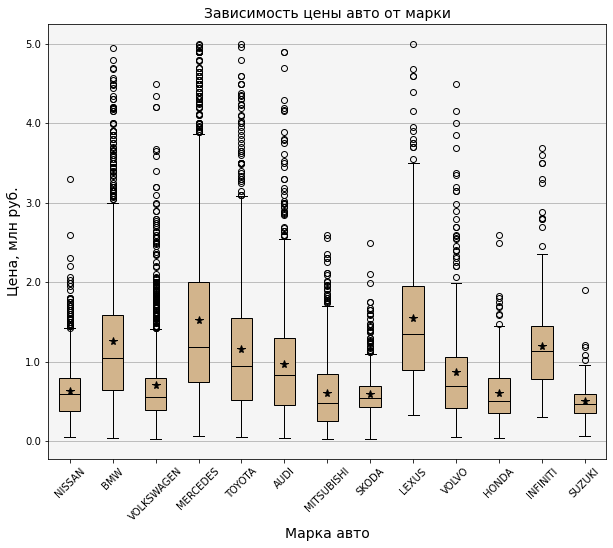

In [17]:
prices = []
for b in brand.index:
    prices.append(df[df['brand']==b]['price'])
fig, ax = plt.subplots(figsize=(10, 8))
bplot = ax.boxplot(prices, labels=brand.index, patch_artist=True, showmeans=True,
                  boxprops = dict(facecolor='tan'),
                  medianprops=dict(color='k'),
                  meanprops=dict(marker='*', markeredgecolor='k', markerfacecolor='k', markersize=8))

ax.set_title('Зависимость цены авто от марки', fontsize=14)
ax.set_xlabel("Марка авто", fontsize=14)
ax.set_ylabel('Цена, млн руб.', fontsize=14)
ax.yaxis.set_major_formatter(lambda x, p: format(round(x/10**6, 2), ','))
ax.patch.set_facecolor('whitesmoke')
ax.yaxis.grid(True)

plt.xticks(rotation=45)
plt.savefig('./Images/Зависимость цены авто от марки.png')
plt.show()

#### Зависимость цены авто от года выпуска, зависимость цены авто от количества владельцев

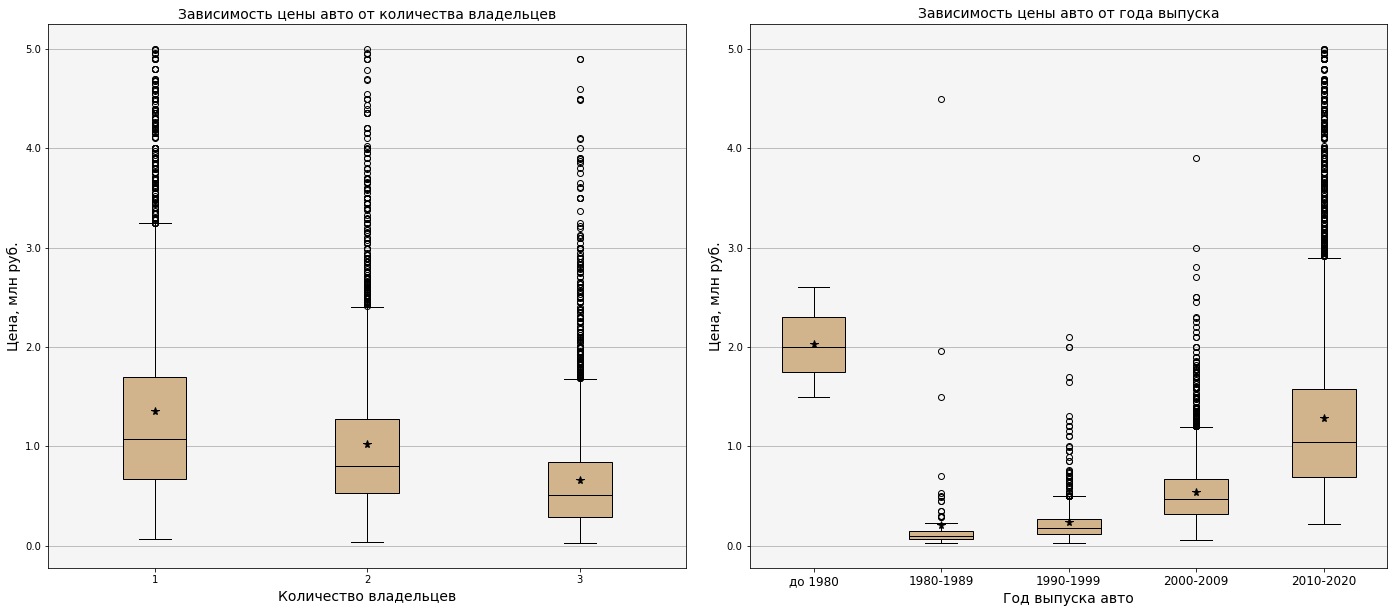

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

prices = []
owners = owners.sort_index()
for b in owners.index:
    prices.append(df[df['num_of_owners']==b]['price'])
bplot = ax[0].boxplot(prices, labels=owners.index, patch_artist=True, showmeans=True,
                  boxprops = dict(facecolor='tan'),
                  medianprops=dict(color='k'),
                  meanprops=dict(marker='*', markeredgecolor='k', markerfacecolor='k', markersize=8))
ax[0].set_title('Зависимость цены авто от количества владельцев', fontsize=14)
ax[0].set_xlabel('Количество владельцев', fontsize=14)
ax[0].set_ylabel('Цена, млн руб.', fontsize=14)
ax[0].yaxis.set_major_formatter(lambda x, p: format(round(x/10**6, 2), ','))
ax[0].patch.set_facecolor('whitesmoke')
ax[0].yaxis.grid(True)


prices = []
prices.append(list(df[df['year']<1980]['price']))
prices.append(list(df[(df['year']<1990) & (df['year']>=1980)]['price']))
prices.append(list(df[(df['year']<2000) & (df['year']>=1990)]['price']))
prices.append(list(df[(df['year']<2010) & (df['year']>=2000)]['price']))
prices.append(list(df[df['year']>=2010]['price']))

labels=['до 1980', '1980-1989', '1990-1999', '2000-2009', '2010-2020']

bplot = ax[1].boxplot(prices, labels=labels, patch_artist=True, showmeans=True,
                      boxprops = dict(facecolor='tan'),
                      medianprops=dict(color='k'),
                      meanprops=dict(marker='*', markeredgecolor='k', markerfacecolor='k', markersize=8))
ax[1].set_title("Зависимость цены авто от года выпуска", fontsize=14)
ax[1].set_xlabel("Год выпуска авто", fontsize=14)
ax[1].set_ylabel('Цена, млн руб.', fontsize=14)
ax[1].yaxis.set_major_formatter(lambda x, p: format(round(x/10**6, 2), ','))
ax[1].patch.set_facecolor('whitesmoke')
ax[1].yaxis.grid(True)

plt.xticks(fontsize=12)
plt.subplots_adjust(wspace=0.1)
plt.savefig('./Images/Зависимость цены авто от количества владельцев, года выпуска.png')
plt.show()

### Корреляционная матрица для количественных переменных

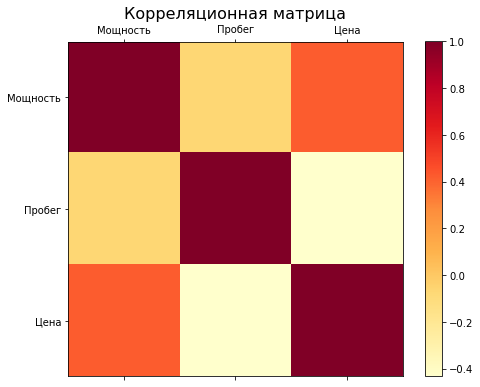

,engine_power,mileage,price
engine_power,1.000000,-0.068211,0.420114
mileage,-0.068211,1.000000,-0.432941
price,0.420114,-0.432941,1.000000


In [19]:
cor = df.drop(['num_of_owners', 'year'], axis=1).corr('kendall')
col_names = ['Мощность', 'Пробег', 'Цена']
f = plt.figure(figsize=(8, 6))
plt.matshow(cor, fignum=f.number, cmap='YlOrRd')
plt.xticks(range(3), col_names, fontsize=10)
plt.yticks(range(3), col_names, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Корреляционная матрица', fontsize=16);
plt.savefig('./Images/Корреляционная матрица для количественных переменных.png')
plt.show()
cor.style.background_gradient(cmap='YlOrRd')

### Анализ наличия корреляции между независимыми переменными

In [20]:
lst = ['num_of_owners','year'] # качественные переменные
for i in range(len(lst)):
    for j in range(len(lst)):
        if i < j:
            contigency = pd.crosstab(df[lst[i]], df[lst[j]], normalize='index') # Таблица кросс-табуляции
            c, p, dof, expected = stats.chi2_contingency(contigency) # Хи-квадрат тест
            print(f'{contigency}\np = {p}')
            
            

# chi2: The test statistic
# p: The p-value of the test
# dof: Degrees of freedom
# expected: The expected frequencies, based on the marginal sums of the table
# Большое p говорит о независимости

year               1937      1954      1973      1980      1982      1983  \
num_of_owners                                                               
1              0.000000  0.000302  0.000000  0.000000  0.000000  0.000000   
2              0.000000  0.000000  0.000000  0.000000  0.000674  0.000000   
3              0.000235  0.000000  0.000235  0.000469  0.000000  0.000235   

year               1984      1985      1986      1987  ...      2011  \
num_of_owners                                          ...             
1              0.000000  0.000604  0.000000  0.000000  ...  0.067894   
2              0.000337  0.001685  0.000000  0.000674  ...  0.111523   
3              0.000704  0.001174  0.002113  0.002113  ...  0.081925   

year               2012      2013      2014      2015      2016      2017  \
num_of_owners                                                               
1              0.101086  0.106820  0.115269  0.100483  0.110441  0.096560   
2              0.13005